# <center>Next Best Offer Recommendation Model For Revenue Optimization in Telecommunication</center>

# Problem Statement

In [3]:
# The objective of this machine learning capstone project is to develop a recommendation system that suggests the next best offer to customers of a 
# telecommunication company. By leveraging machine learning techniques, the company aims to personalize offers and promotions, ultimately increasing 
# revenue and customer engagement.

## 1. Data Aquisition

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import random

In [6]:
# Machine learning algorithms and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
# Hypothesis testing
from scipy import stats

In [7]:
df=pd.read_csv('data_summer_course.csv')

## 2. Data Preparation and Exploratory Data Analysis

In [9]:
df.head()

,Mobile_Number,MAINACTBAL,LASTVCEUSGDATE,LASTRECHRGDATE,FIRSTCALLDATE,DEVICETYPE,ISDEVICE3GENABLED,VASSUBSCRIBERFLAG,ISDEVICEDATAENABLED,AGEONNETWORK,...,SUMVCEREVCD1_30,SUMDATAREVCD1_30,SUMDATAUSGCD1_30,SUMVOICEUSGCD1_30,SUMDATAUSG4GCD1_15,SUMDATAUSG4GCD15_30,SMARTPHONEFLAG,MAINACTBAL1,CNTZEROBALCD_1,FIRSTREVGENEVTDATE
0,61159748,0.2630,04/16/2023 00:00:00,04/08/2023 00:00:00,04/14/2022 00:00:00,Smartphone,Y,N,Y,368.0,...,22.985625,0.00000,1.133457e+10,12878.0,275794501.0,1.105682e+10,Y,0.26304,0,04/14/2022 00:00:00
1,17488035,0.1901,04/15/2023 00:00:00,03/26/2023 00:00:00,06/13/2007 00:00:00,Smartphone,Y,N,Y,5786.0,...,26.570050,0.00000,0.000000e+00,652.0,0.0,0.000000e+00,Y,0.19011,0,06/14/2007 00:00:00
2,43749562,0.1243,04/01/2023 00:00:00,01/31/2023 00:00:00,02/16/2022 00:00:00,Voice Centric,N,N,N,425.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,0.12430,0,02/16/2022 00:00:00
3,87451055,1.6096,04/16/2023 00:00:00,04/11/2023 00:00:00,06/29/2013 00:00:00,Smartphone,Y,N,Y,3570.0,...,30.480910,0.52052,4.288550e+05,2721.0,426609.0,2.246000e+03,Y,1.60957,0,07/08/2013 00:00:00
4,64576359,5.1838,04/16/2023 00:00:00,04/10/2023 00:00:00,04/30/2012 00:00:00,Voice Centric,N,N,N,3999.0,...,95.027229,0.00000,0.000000e+00,3123.0,0.0,0.000000e+00,N,5.18376,0,05/05/2012 00:00:00


In [10]:
df.shape

(200000, 30)

In [11]:
# Summary statistics for numerical features
df.describe()

,Mobile_Number,MAINACTBAL,AGEONNETWORK,SUBSRIBERLASTBALANCE,CNTCHURND1_30,HANDSETCHANGESFLAGD1_30,DEVICEDUALSIMFLAG,ARPUD1_30,SUMVCEREVCD1_30,SUMDATAREVCD1_30,SUMDATAUSGCD1_30,SUMVOICEUSGCD1_30,SUMDATAUSG4GCD1_15,SUMDATAUSG4GCD15_30,MAINACTBAL1,CNTZEROBALCD_1
count,2.000000e+05,200000.000000,200000.000000,200000.000000,89137.000000,35507.000000,121644.00000,200000.000000,154881.000000,151717.000000,1.551420e+05,155142.000000,1.497920e+05,1.520080e+05,200000.000000,200000.000000
mean,4.543535e+07,11.007088,1993.406405,11.007088,1.843398,1.364942,1.99649,176.082796,43.608401,2.491229,4.339707e+09,7641.116912,1.875771e+09,2.041547e+09,11.007088,0.003020
std,2.900110e+07,48.991782,1774.404666,48.991782,1.031201,0.789854,0.44538,297.788781,87.563824,6.910859,1.172820e+10,13910.996894,5.541364e+09,5.982678e+09,48.991782,0.054872
min,2.435000e+03,0.000000,101.000000,0.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,2.015619e+07,0.008600,531.000000,0.008600,1.000000,1.000000,2.00000,0.000000,0.000000,0.000000,0.000000e+00,435.000000,0.000000e+00,0.000000e+00,0.008610,0.000000
50%,4.208031e+07,0.141900,1369.000000,0.141900,2.000000,1.000000,2.00000,58.000000,9.217591,0.000000,1.327200e+04,2573.000000,0.000000e+00,0.000000e+00,0.141880,0.000000
75%,6.797840e+07,8.298200,3129.000000,8.298200,2.000000,2.000000,2.00000,216.000000,50.621675,0.455455,1.666354e+09,8977.750000,9.751026e+07,1.794456e+08,8.298160,0.000000
max,9.998810e+07,4909.386900,6638.000000,4909.386900,8.000000,30.000000,6.00000,9251.000000,5313.730175,225.059835,2.380753e+11,666309.000000,1.588541e+11,1.048388e+11,4909.386700,1.000000


In [12]:
# Summary statistics for categorical features
df.describe(include=['object','category'])

,LASTVCEUSGDATE,LASTRECHRGDATE,FIRSTCALLDATE,DEVICETYPE,ISDEVICE3GENABLED,VASSUBSCRIBERFLAG,ISDEVICEDATAENABLED,LASTREVGENEVTDATE,last_app_used,CUSTSEGMENT,DEVICENETWORK,DEVICEMODELC,SMARTPHONEFLAG,FIRSTREVGENEVTDATE
count,199981,199852,199981,200000,200000,200000,200000,200000,79836,51917,121644,121644,200000,200000
unique,180,1472,6509,3,2,2,2,91,471,5,5,4969,2,6471
top,04/16/2023 00:00:00,04/16/2023 00:00:00,07/06/2020 00:00:00,Voice Centric,N,N,Y,04/16/2023 00:00:00,2023-04-17,Basic,4G,Itel Technology Limited IT2171/Value 110,N,12/31/2011 00:00:00
freq,159154,24185,279,99643,101035,196941,127802,101093,7035,30061,53857,2834,100717,307


In [13]:
date_columns = ['LASTVCEUSGDATE', 'LASTRECHRGDATE', 'FIRSTCALLDATE', 'LASTREVGENEVTDATE', 'FIRSTREVGENEVTDATE']
for column in date_columns:
    df[column] = pd.to_datetime(df[column], errors='coerce')

## 3. Find and Impute Missing Values

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Mobile_Number            200000 non-null  int64         
 1   MAINACTBAL               200000 non-null  float64       
 2   LASTVCEUSGDATE           199981 non-null  datetime64[ns]
 3   LASTRECHRGDATE           199852 non-null  datetime64[ns]
 4   FIRSTCALLDATE            199981 non-null  datetime64[ns]
 5   DEVICETYPE               200000 non-null  object        
 6   ISDEVICE3GENABLED        200000 non-null  object        
 7   VASSUBSCRIBERFLAG        200000 non-null  object        
 8   ISDEVICEDATAENABLED      200000 non-null  object        
 9   AGEONNETWORK             200000 non-null  float64       
 10  LASTREVGENEVTDATE        200000 non-null  datetime64[ns]
 11  SUBSRIBERLASTBALANCE     200000 non-null  float64       
 12  last_app_used   

In [16]:
df= df.drop_duplicates(subset=['Mobile_Number'])

In [17]:
(df.isnull().sum()/ len(df)) * 100

Mobile_Number               0.000000
MAINACTBAL                  0.000000
LASTVCEUSGDATE              0.009501
LASTRECHRGDATE              0.074007
FIRSTCALLDATE               0.009501
DEVICETYPE                  0.000000
ISDEVICE3GENABLED           0.000000
VASSUBSCRIBERFLAG           0.000000
ISDEVICEDATAENABLED         0.000000
AGEONNETWORK                0.000000
LASTREVGENEVTDATE           0.000000
SUBSRIBERLASTBALANCE        0.000000
last_app_used              60.082208
CUSTSEGMENT                74.040034
CNTCHURND1_30              55.430766
HANDSETCHANGESFLAGD1_30    82.247313
DEVICENETWORK              39.176222
DEVICEMODELC               39.176222
DEVICEDUALSIMFLAG          39.176222
ARPUD1_30                   0.000000
SUMVCEREVCD1_30            22.559143
SUMDATAREVCD1_30           24.141293
SUMDATAUSGCD1_30           22.428631
SUMVOICEUSGCD1_30          22.428631
SUMDATAUSG4GCD1_15         25.103385
SUMDATAUSG4GCD15_30        23.995780
SMARTPHONEFLAG              0.000000
M

In [18]:
# Drop multiple unnecessary columns
df = df.drop(columns=['SUBSRIBERLASTBALANCE', 'DEVICEMODELC', 'MAINACTBAL1', 'CNTZEROBALCD_1','HANDSETCHANGESFLAGD1_30','last_app_used','DEVICEDUALSIMFLAG','CNTCHURND1_30'])

In [19]:
features_to_impute = ['SUMVCEREVCD1_30', 'SUMDATAREVCD1_30', 'SUMDATAUSGCD1_30', 'SUMVOICEUSGCD1_30','SUMDATAUSG4GCD1_15','SUMDATAUSG4GCD15_30']

for feature in features_to_impute:
    mean_value = df[feature].mean()  # Calculate the mean
    df[feature].fillna(mean_value, inplace=True)  # Fill missing values with the mean

# 4. Feature Engineering

In [21]:
# Assuming the columns are named 'ISDEVICE3GENABLED' and 'ISDEVICE4GENABLED'

# Add a new column 'DEVICE_NETWORK' based on the conditions
df['DEVICE_NETWORK'] = df.apply(
    lambda row: '4G' if row['DEVICENETWORK'] == '4G' 
                            else ('5G' if row['DEVICENETWORK'] == '5G'
                                  else ('3G' if row['ISDEVICE3GENABLED'] == 'Y' 
                                         else ('2G' if row['DEVICENETWORK'] == '2G'
                                                else ('1G' if row['DEVICENETWORK'] == '1G'
                                                     else random.choice(['1G', '2G']))))),
    axis=1
)
df = df.drop(columns=['DEVICENETWORK'])

In [22]:
df['DEVICE_NETWORK'].value_counts()

DEVICE_NETWORK
1G    62190
4G    53852
3G    50479
2G    31830
5G     1630
Name: count, dtype: int64

In [23]:
# Define the columns to check for null values
columns_to_check = ['LASTVCEUSGDATE', 'LASTRECHRGDATE', 'FIRSTCALLDATE']

# Drop rows where any of the specified columns have null values
df = df.dropna(subset=columns_to_check)

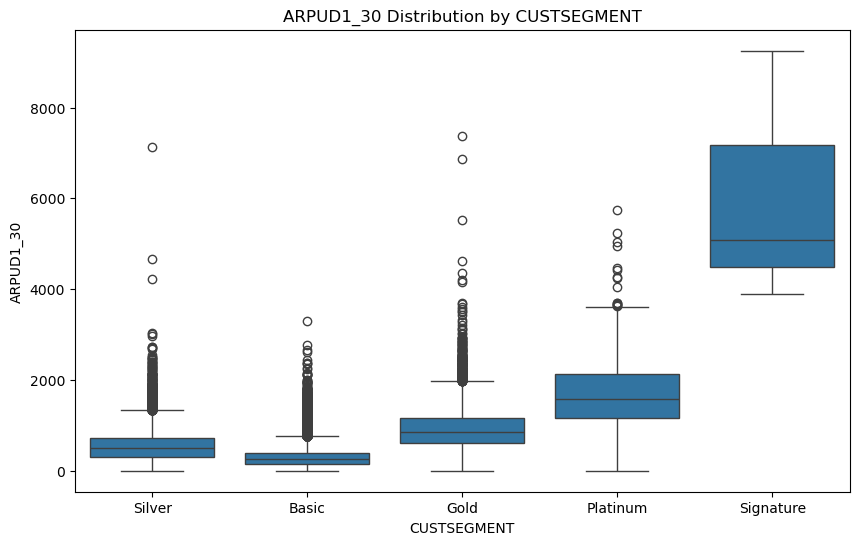

               count         mean          std     min      25%     50%  \
CUSTSEGMENT                                                               
Basic        30059.0   305.557477   250.785181     0.0   157.00   261.0   
Gold          7632.0   916.529612   501.314582     0.0   617.00   857.0   
Platinum       498.0  1719.064598   827.194096     0.0  1152.25  1574.5   
Signature        3.0  6080.000000  2809.779529  3900.0  4494.50  5089.0   
Silver       13723.0   542.330606   368.907503     0.0   312.00   499.0   

                 75%     max  
CUSTSEGMENT                   
Basic         397.00  3297.0  
Gold         1161.25  7367.0  
Platinum     2139.75  5740.0  
Signature    7170.00  9251.0  
Silver        718.00  7120.0  


In [24]:
# Step 1: Analyze the Relationship
# Show boxplot of ARPUD1_30 for different known CUSTSEGMENT values
plt.figure(figsize=(10, 6))
sns.boxplot(x='CUSTSEGMENT', y='ARPUD1_30', data=df[df['CUSTSEGMENT'].notna()])
plt.title('ARPUD1_30 Distribution by CUSTSEGMENT')
plt.show()

# Calculate descriptive statistics for ARPUD1_30 grouped by CUSTSEGMENT
segment_stats = df[df['CUSTSEGMENT'].notna()].groupby('CUSTSEGMENT')['ARPUD1_30'].describe()
print(segment_stats)

# Step 2: Impute Missing CUSTSEGMENT Based on ARPUD1_30 Ranges
# Define ranges based on descriptive statistics
def impute_custsegment(row):
    if pd.isna(row['CUSTSEGMENT']):
        random_value = np.random.uniform(0, 1)  # Generate a random number between 0 and 1
        
        if 157 < row['ARPUD1_30'] < 397:  
            return np.random.choice(['Basic', 'Silver'], p=[0.8, 0.2])
        elif 312 <= row['ARPUD1_30'] < 718:
            return np.random.choice(['Silver', 'Gold'], p=[0.7, 0.3])
        elif 617 <= row['ARPUD1_30'] < 1161.25:
            return np.random.choice(['Gold', 'Platinum'], p=[0.6, 0.4])
        elif 1152.25 <= row['ARPUD1_30'] < 2139.75:
            return np.random.choice(['Platinum', 'Signature'], p=[0.85, 0.15])
        elif 4494.50 <= row['ARPUD1_30'] < 7170.00:
            return 'Signature'
        else:
            return np.random.choice(['Basic', 'Silver', 'Gold', 'Platinum', 'Signature'])
    else:
        return row['CUSTSEGMENT']

# Apply the function to impute missing values
df['CUSTSEGMENT'] = df.apply(impute_custsegment, axis=1)

In [25]:
#Checking again for null values
(df.isnull().sum()/ len(df)) * 100

Mobile_Number          0.0
MAINACTBAL             0.0
LASTVCEUSGDATE         0.0
LASTRECHRGDATE         0.0
FIRSTCALLDATE          0.0
DEVICETYPE             0.0
ISDEVICE3GENABLED      0.0
VASSUBSCRIBERFLAG      0.0
ISDEVICEDATAENABLED    0.0
AGEONNETWORK           0.0
LASTREVGENEVTDATE      0.0
CUSTSEGMENT            0.0
ARPUD1_30              0.0
SUMVCEREVCD1_30        0.0
SUMDATAREVCD1_30       0.0
SUMDATAUSGCD1_30       0.0
SUMVOICEUSGCD1_30      0.0
SUMDATAUSG4GCD1_15     0.0
SUMDATAUSG4GCD15_30    0.0
SMARTPHONEFLAG         0.0
FIRSTREVGENEVTDATE     0.0
DEVICE_NETWORK         0.0
dtype: float64

# 5. Data Visualization and Analysis

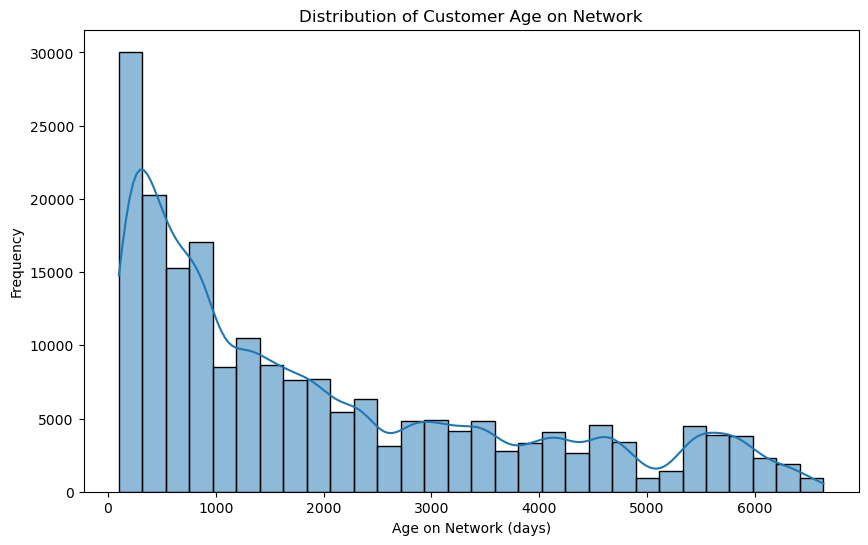

In [27]:
# Univariate Analysis
# Distribution of Age on network
plt.figure(figsize=(10,6))
sns.histplot(df['AGEONNETWORK'], bins=30, kde=True)
plt.title('Distribution of Customer Age on Network')
plt.xlabel('Age on Network (days)')
plt.ylabel('Frequency')
plt.show()

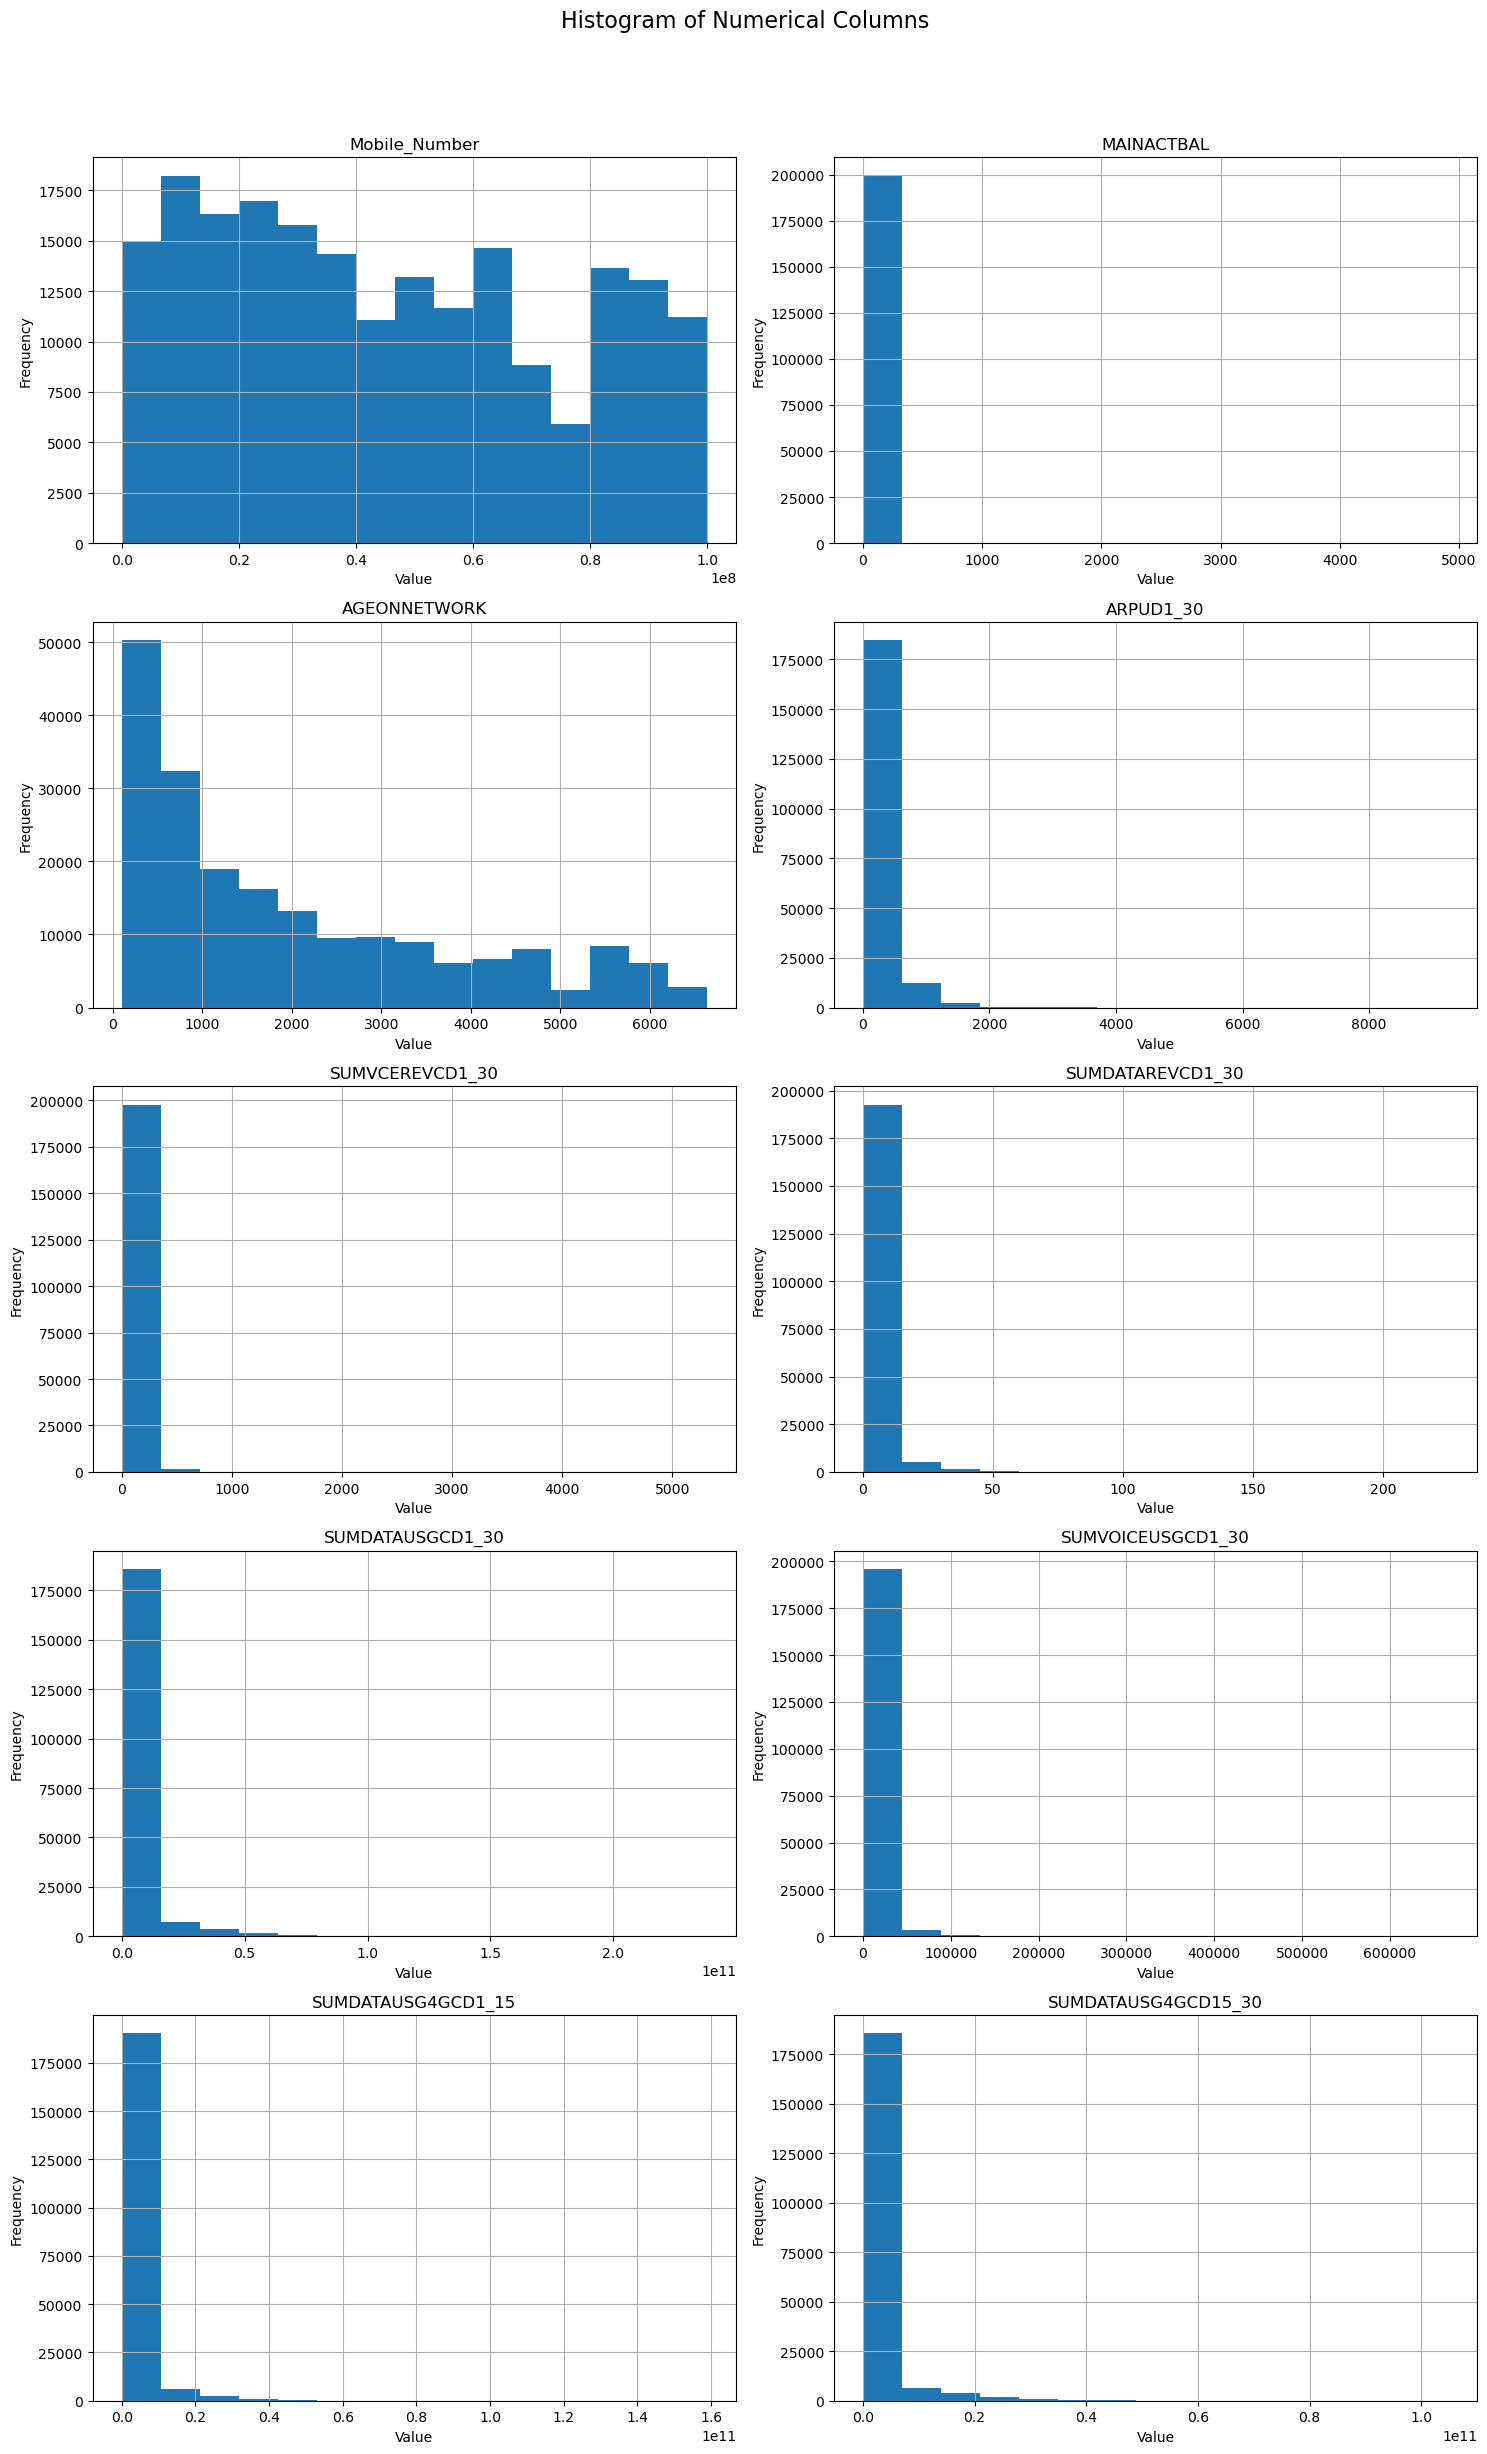

In [28]:
# Assuming df is your DataFrame
# Select numerical columns
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Determine the number of columns
num_cols = len(numerical_df.columns)

# Determine the number of rows and columns for the layout
num_rows = (num_cols + 1) // 2  # Adding 1 to handle an odd number of columns

# Create histograms for each numerical column
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5 * num_rows))
fig.suptitle("Histogram of Numerical Columns", fontsize=16)

# Flatten axes array for easy iteration if there's only one row or column
axes = axes.flatten()

# Plot each histogram
for i, column in enumerate(numerical_df.columns):
    numerical_df[column].hist(ax=axes[i], bins=15)
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the suptitle
plt.show()

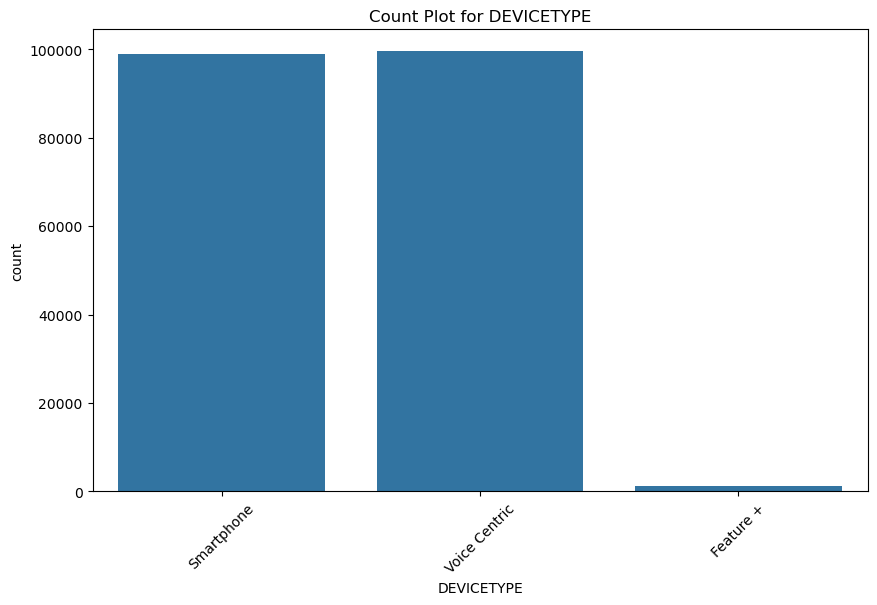

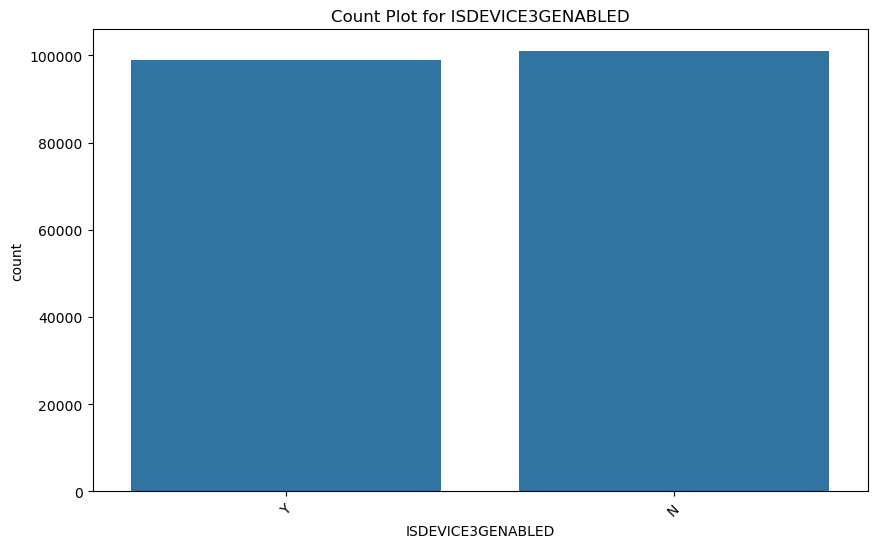

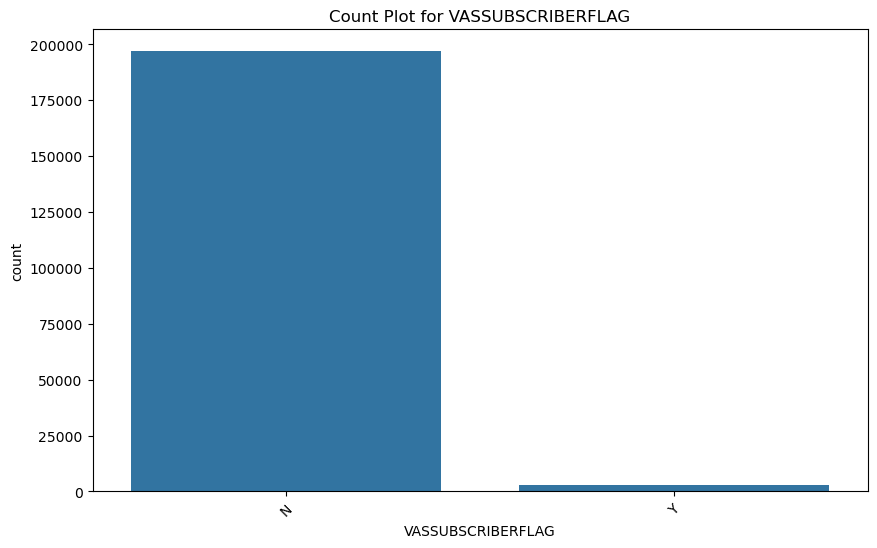

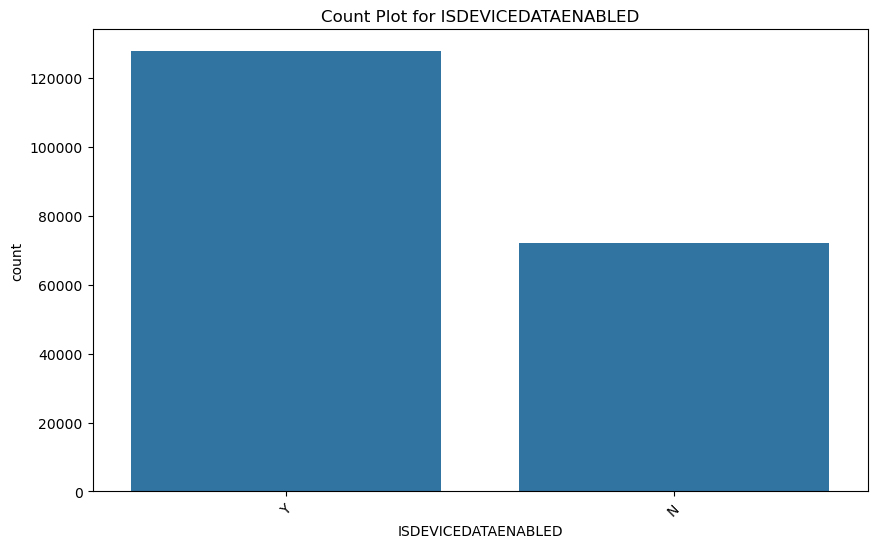

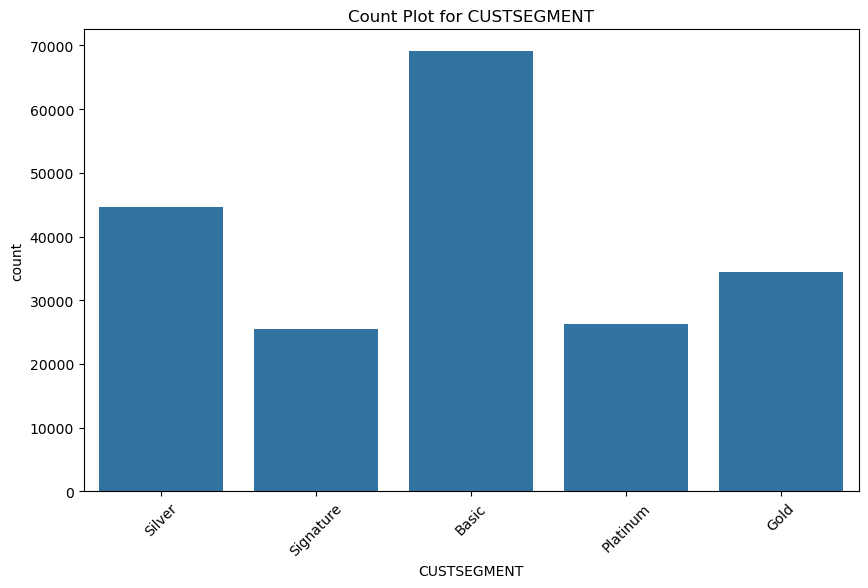

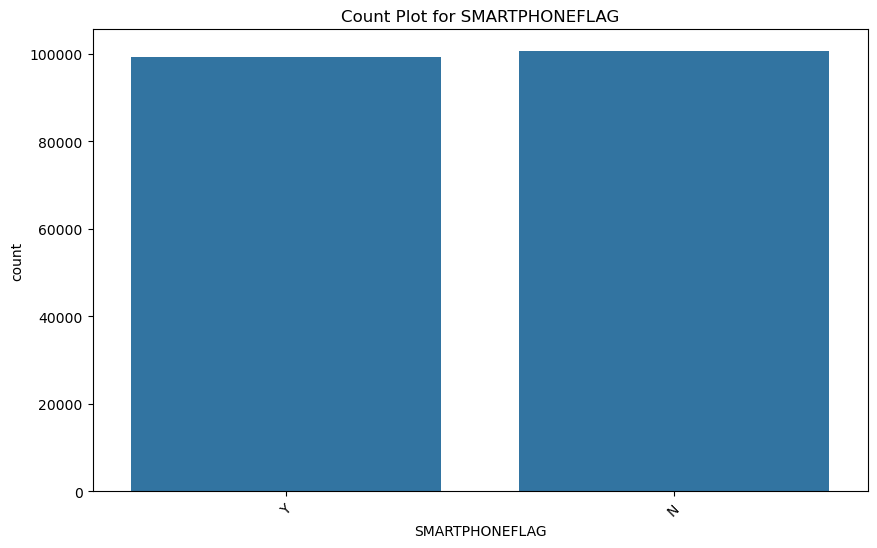

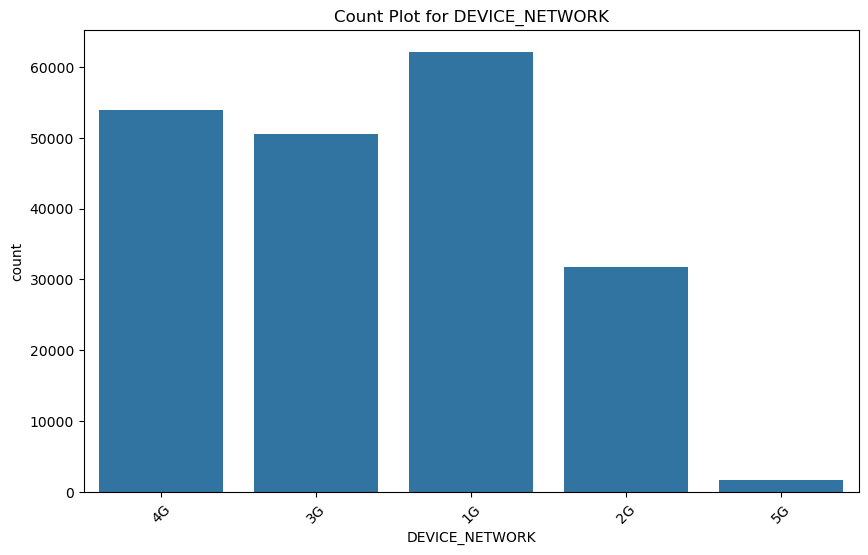

In [29]:
# Univariate Analysis
# Bar plots for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df)
    plt.title(f"Count Plot for {col}")
    plt.xticks(rotation=45)
    plt.show()

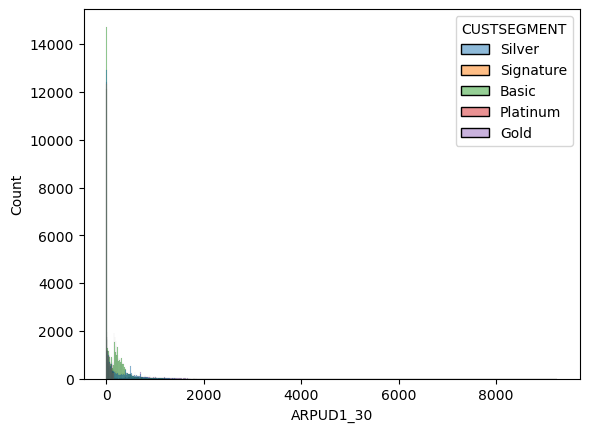

In [30]:
sns.histplot(hue='CUSTSEGMENT',x='ARPUD1_30',data=df)
plt.show()

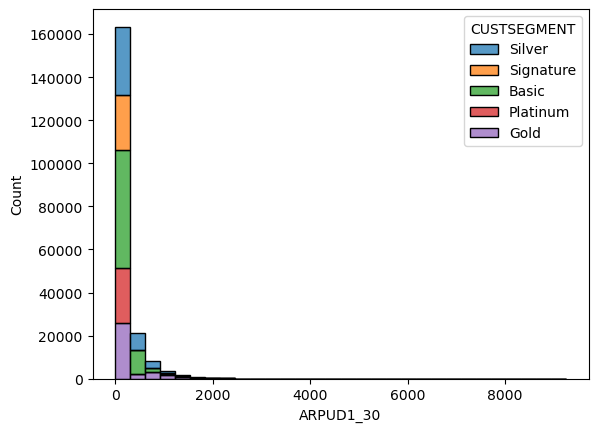

In [31]:
sns.histplot(data=df,x='ARPUD1_30', hue='CUSTSEGMENT',multiple='stack',bins=30)
plt.show()

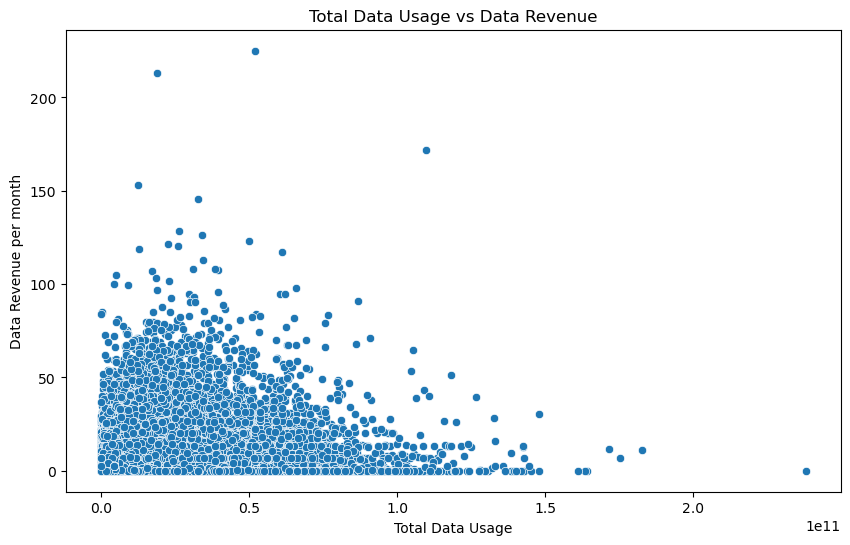

In [32]:
# Bivariate and Multivariate Analysis
# Relationship between Total data usage and Data revenue in a month
plt.figure(figsize=(10,6))
sns.scatterplot(x='SUMDATAUSGCD1_30', y='SUMDATAREVCD1_30', data=df)
plt.title('Total Data Usage vs Data Revenue')
plt.xlabel('Total Data Usage')
plt.ylabel('Data Revenue per month')
plt.show()

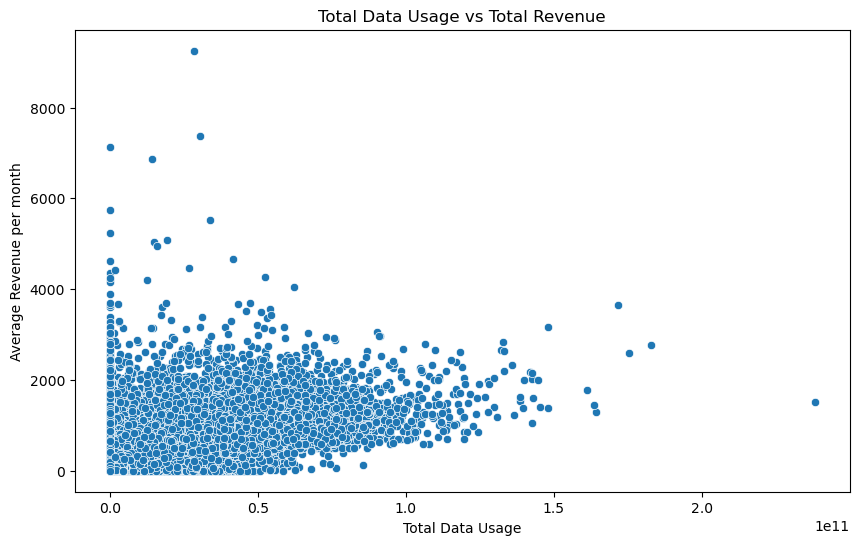

In [33]:
# Relationship between Total data usage and Average Revenue in a month
plt.figure(figsize=(10,6))
sns.scatterplot(x='SUMDATAUSGCD1_30', y='ARPUD1_30', data=df)
plt.title('Total Data Usage vs Total Revenue')
plt.xlabel('Total Data Usage')
plt.ylabel('Average Revenue per month')
plt.show()

In [34]:
# # Bivariate and Multivariate Analysis
# # Relationship between Total data usage and Data revenue in a month
# plt.figure(figsize=(10,6))
# sns.scatterplot(x='AGEONNETWORK', y='SUMDATAREVCD1_30', data=df)
# plt.title('Age of Network vs Data Revenue')
# plt.xlabel('Age of Network')
# plt.ylabel('Data Revenue per month')
# plt.show()

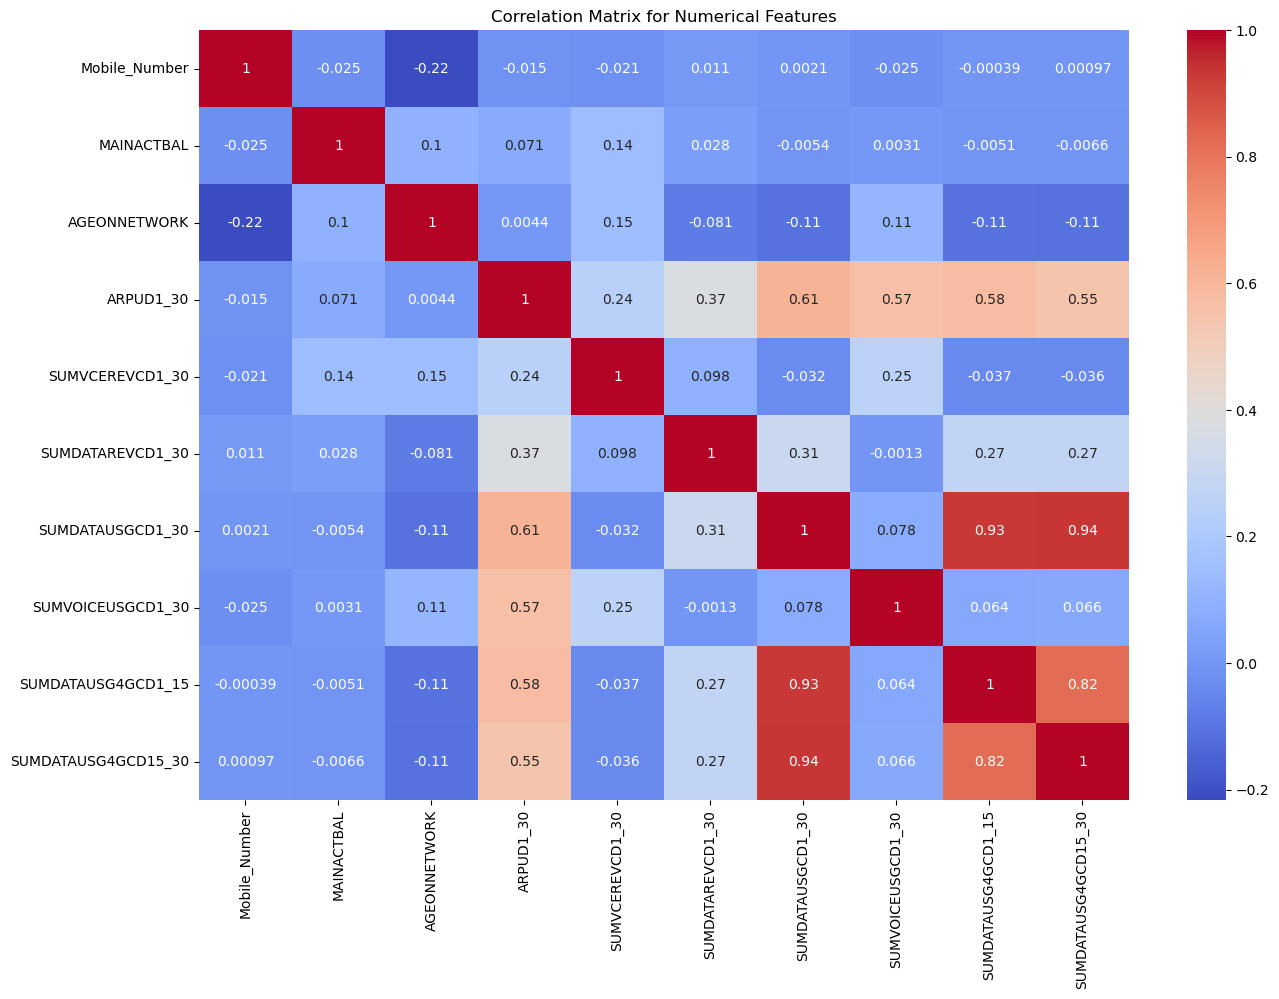

In [35]:
# Multivariate Analysis
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
corr = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Features')
plt.show()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199814 entries, 0 to 199999
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Mobile_Number        199814 non-null  int64         
 1   MAINACTBAL           199814 non-null  float64       
 2   LASTVCEUSGDATE       199814 non-null  datetime64[ns]
 3   LASTRECHRGDATE       199814 non-null  datetime64[ns]
 4   FIRSTCALLDATE        199814 non-null  datetime64[ns]
 5   DEVICETYPE           199814 non-null  object        
 6   ISDEVICE3GENABLED    199814 non-null  object        
 7   VASSUBSCRIBERFLAG    199814 non-null  object        
 8   ISDEVICEDATAENABLED  199814 non-null  object        
 9   AGEONNETWORK         199814 non-null  float64       
 10  LASTREVGENEVTDATE    199814 non-null  datetime64[ns]
 11  CUSTSEGMENT          199814 non-null  object        
 12  ARPUD1_30            199814 non-null  float64       
 13  SUMVCEREVCD1_30    

# 6. Outlier Analysis

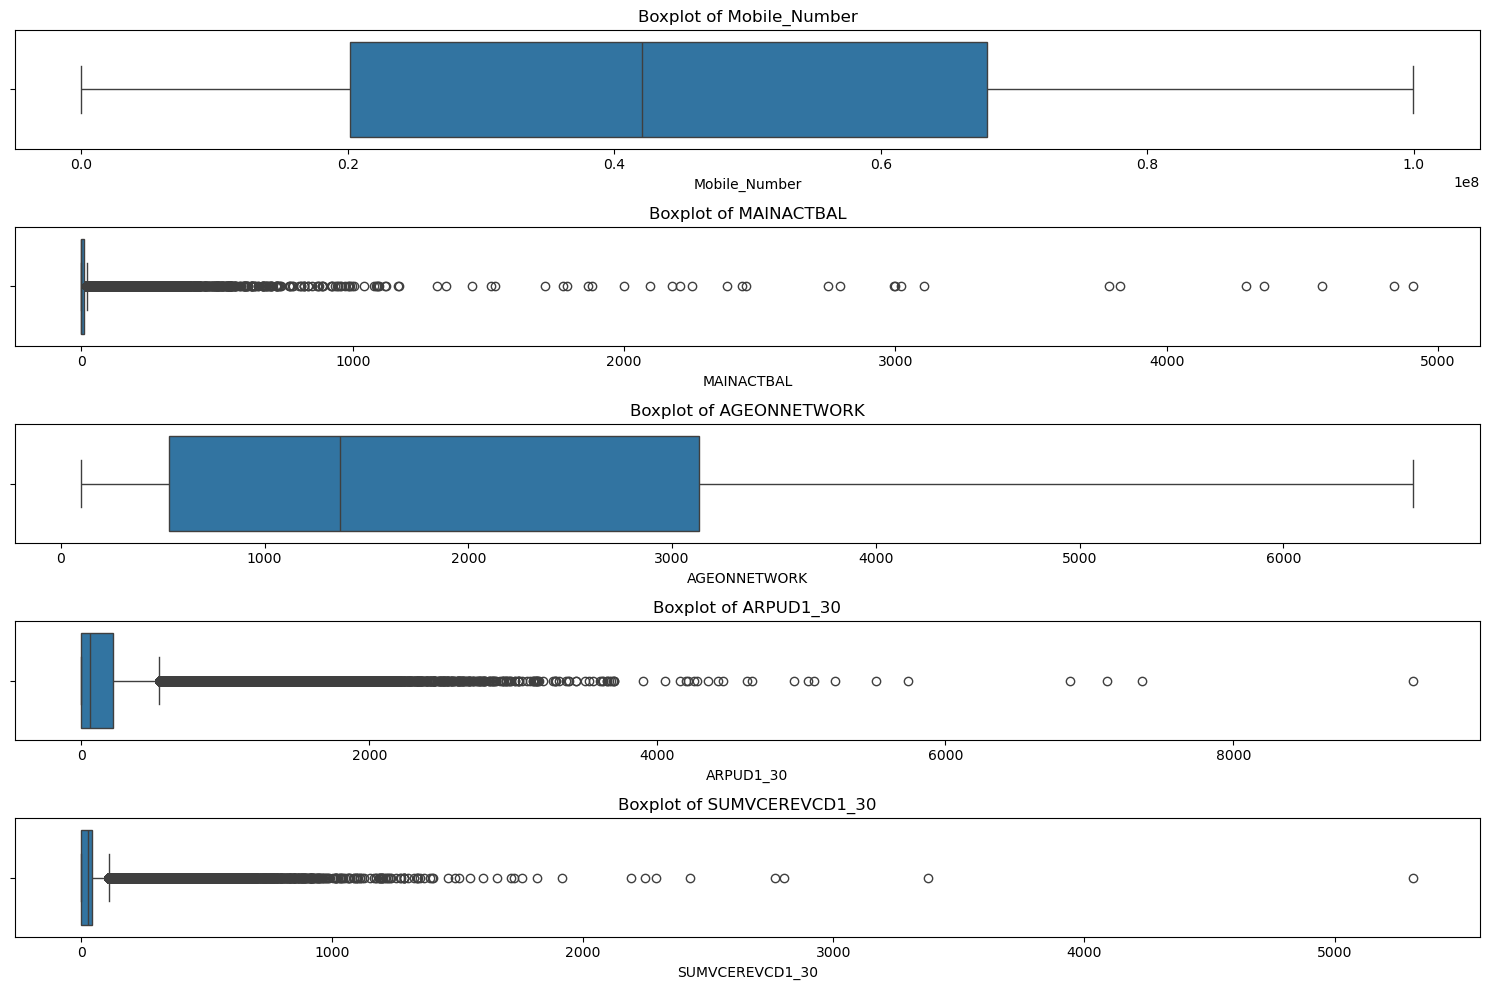

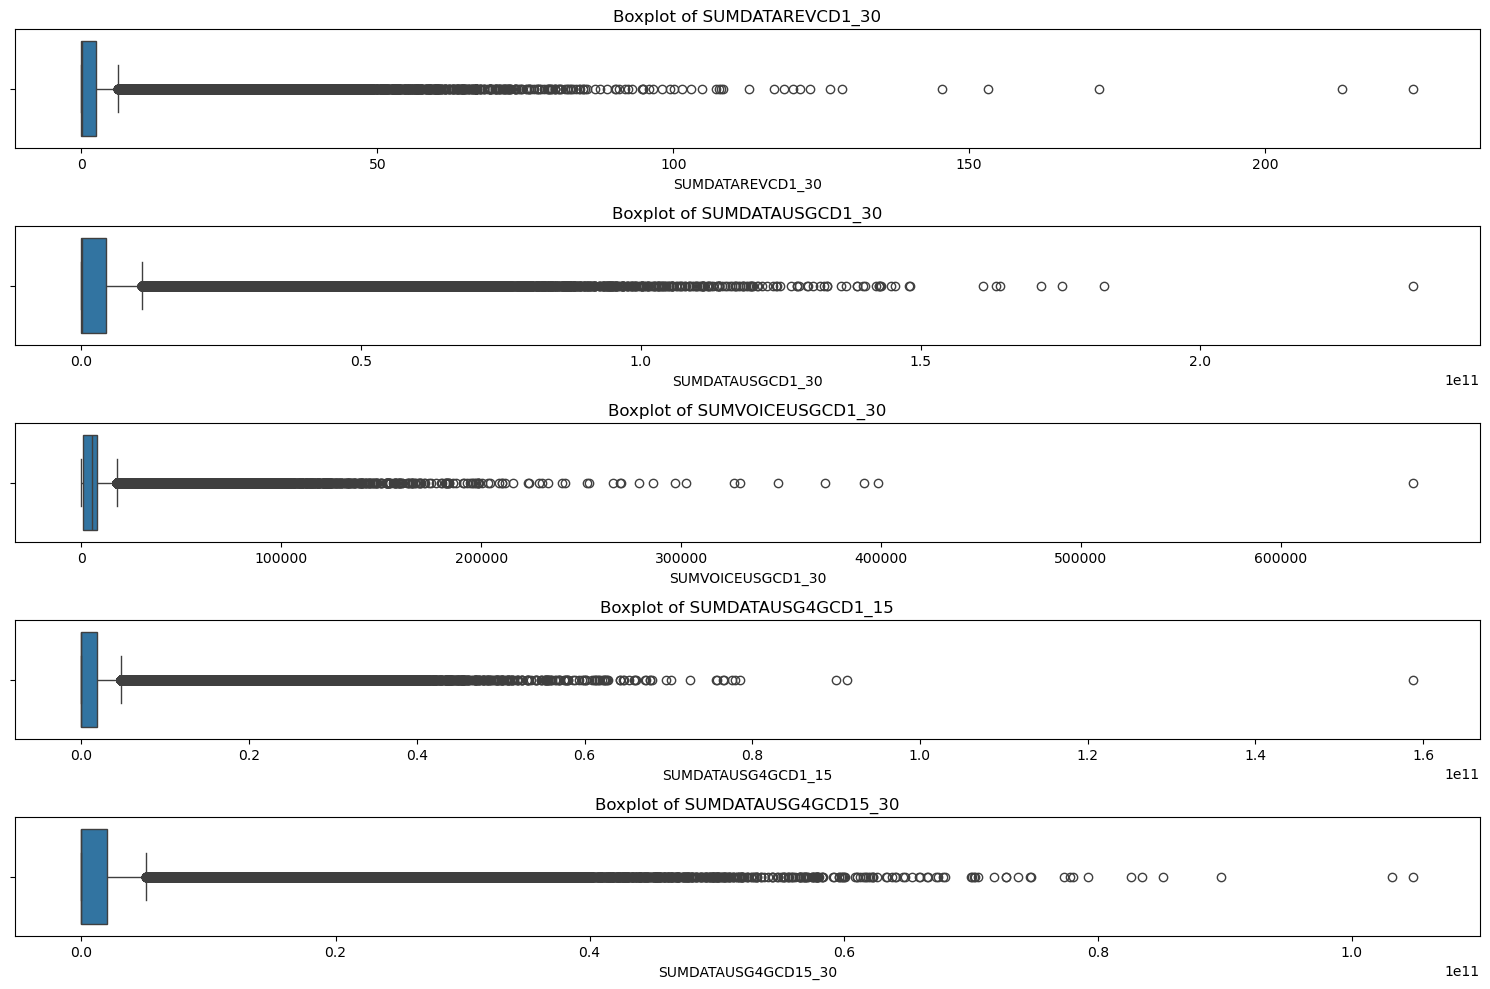

In [38]:
chunk_size = 5
chunks = [numerical_df.columns[i:i + chunk_size] for i in range(0, len(numerical_df.columns), chunk_size)]

# Step 4: Plot each chunk of boxplots
for chunk in chunks:
    plt.figure(figsize=(15, 10))  # Adjust figure size for each chunk
    for i, column in enumerate(chunk, 1):
        plt.subplot(len(chunk), 1, i)
        sns.boxplot(x=numerical_df[column])
        plt.title(f'Boxplot of {column}')
    plt.tight_layout()  # Ensure proper spacing between subplots
    plt.show()

In [39]:
df.head()

,Mobile_Number,MAINACTBAL,LASTVCEUSGDATE,LASTRECHRGDATE,FIRSTCALLDATE,DEVICETYPE,ISDEVICE3GENABLED,VASSUBSCRIBERFLAG,ISDEVICEDATAENABLED,AGEONNETWORK,...,ARPUD1_30,SUMVCEREVCD1_30,SUMDATAREVCD1_30,SUMDATAUSGCD1_30,SUMVOICEUSGCD1_30,SUMDATAUSG4GCD1_15,SUMDATAUSG4GCD15_30,SMARTPHONEFLAG,FIRSTREVGENEVTDATE,DEVICE_NETWORK
0,61159748,0.2630,2023-04-16,2023-04-08,2022-04-14,Smartphone,Y,N,Y,368.0,...,620.0,22.985625,0.000000,1.133457e+10,12878.00000,2.757945e+08,1.105682e+10,Y,2022-04-14,4G
1,17488035,0.1901,2023-04-15,2023-03-26,2007-06-13,Smartphone,Y,N,Y,5786.0,...,100.0,26.570050,0.000000,0.000000e+00,652.00000,0.000000e+00,0.000000e+00,Y,2007-06-14,3G
2,43749562,0.1243,2023-04-01,2023-01-31,2022-02-16,Voice Centric,N,N,N,425.0,...,0.0,43.609655,2.491381,4.340080e+09,7641.31728,1.875925e+09,2.041732e+09,N,2022-02-16,1G
3,87451055,1.6096,2023-04-16,2023-04-11,2013-06-29,Smartphone,Y,N,Y,3570.0,...,91.0,30.480910,0.520520,4.288550e+05,2721.00000,4.266090e+05,2.246000e+03,Y,2013-07-08,4G
4,64576359,5.1838,2023-04-16,2023-04-10,2012-04-30,Voice Centric,N,N,N,3999.0,...,88.0,95.027229,0.000000,0.000000e+00,3123.00000,0.000000e+00,0.000000e+00,N,2012-05-05,2G


In [40]:
# df.columns

In [41]:
# df['CNTCHURND1_30'].value_counts()

In [42]:
df['ISDEVICEDATAENABLED'].value_counts()

ISDEVICEDATAENABLED
Y    127725
N     72089
Name: count, dtype: int64

## 7. Z-Score Analysis and Outlier Treatment

In [44]:

# List of features to check for outliers using Z-score
numerical_features = ['MAINACTBAL','AGEONNETWORK','ARPUD1_30','SUMVCEREVCD1_30', 
                      'SUMDATAREVCD1_30', 'SUMDATAUSGCD1_30', 'SUMVOICEUSGCD1_30', 
                      'SUMDATAUSG4GCD1_15', 'SUMDATAUSG4GCD15_30']

# Calculate Z-scores for the numerical features
z_scores = stats.zscore(df[numerical_features])

# Define Z-score thresholds for identifying outliers
lower_threshold = -3
upper_threshold = 3

# Identify rows where any Z-score is outside the range [-3, 3]
outlier_mask = (z_scores < lower_threshold) | (z_scores > upper_threshold)

# Keep rows where no Z-score is outside the range
df_cleaned = df[~outlier_mask.any(axis=1)]

# Check the summary statistics of the cleaned DataFrame
print(df_cleaned[numerical_features].describe())

# Check the number of rows before and after
print(f"Original number of rows: {df.shape[0]}")
print(f"Number of rows after removing outliers: {df_cleaned.shape[0]}")



          MAINACTBAL   AGEONNETWORK      ARPUD1_30  SUMVCEREVCD1_30  \
count  180524.000000  180524.000000  180524.000000    180524.000000   
mean        8.151241    1989.232844     111.880815        36.217190   
std        18.529759    1763.332661     165.538941        46.585950   
min         0.000000     101.000000       0.000000         0.000000   
25%         0.008600     535.000000       0.000000         0.000000   
50%         0.131700    1372.000000      40.000000        27.969175   
75%         7.040225    3125.000000     158.000000        43.609655   
max       157.721600    6638.000000    1069.000000       274.868100   

       SUMDATAREVCD1_30  SUMDATAUSGCD1_30  SUMVOICEUSGCD1_30  \
count     180524.000000      1.805240e+05      180524.000000   
mean           1.735457      2.413564e+09        6075.302827   
std            3.124826      4.238547e+09        6904.126581   
min            0.000000      0.000000e+00           0.000000   
25%            0.000000      0.000000e+0

In [45]:
df_cleaned.head()


,Mobile_Number,MAINACTBAL,LASTVCEUSGDATE,LASTRECHRGDATE,FIRSTCALLDATE,DEVICETYPE,ISDEVICE3GENABLED,VASSUBSCRIBERFLAG,ISDEVICEDATAENABLED,AGEONNETWORK,...,ARPUD1_30,SUMVCEREVCD1_30,SUMDATAREVCD1_30,SUMDATAUSGCD1_30,SUMVOICEUSGCD1_30,SUMDATAUSG4GCD1_15,SUMDATAUSG4GCD15_30,SMARTPHONEFLAG,FIRSTREVGENEVTDATE,DEVICE_NETWORK
0,61159748,0.2630,2023-04-16,2023-04-08,2022-04-14,Smartphone,Y,N,Y,368.0,...,620.0,22.985625,0.000000,1.133457e+10,12878.00000,2.757945e+08,1.105682e+10,Y,2022-04-14,4G
1,17488035,0.1901,2023-04-15,2023-03-26,2007-06-13,Smartphone,Y,N,Y,5786.0,...,100.0,26.570050,0.000000,0.000000e+00,652.00000,0.000000e+00,0.000000e+00,Y,2007-06-14,3G
2,43749562,0.1243,2023-04-01,2023-01-31,2022-02-16,Voice Centric,N,N,N,425.0,...,0.0,43.609655,2.491381,4.340080e+09,7641.31728,1.875925e+09,2.041732e+09,N,2022-02-16,1G
3,87451055,1.6096,2023-04-16,2023-04-11,2013-06-29,Smartphone,Y,N,Y,3570.0,...,91.0,30.480910,0.520520,4.288550e+05,2721.00000,4.266090e+05,2.246000e+03,Y,2013-07-08,4G
4,64576359,5.1838,2023-04-16,2023-04-10,2012-04-30,Voice Centric,N,N,N,3999.0,...,88.0,95.027229,0.000000,0.000000e+00,3123.00000,0.000000e+00,0.000000e+00,N,2012-05-05,2G


In [46]:
df_cleaned['DEVICE_NETWORK'].value_counts()

DEVICE_NETWORK
1G    59163
4G    46385
3G    43629
2G    30085
5G     1262
Name: count, dtype: int64

In [47]:
df_cleaned['DEVICETYPE'].value_counts()


DEVICETYPE
Voice Centric    94553
Smartphone       84737
Feature +         1234
Name: count, dtype: int64

In [48]:
df_cleaned.shape

(180524, 22)

# 8. Data Transformation

In [50]:
net_encoder = LabelEncoder()
df_cleaned['DEVICE_NETWORK']=net_encoder.fit_transform(df_cleaned['DEVICE_NETWORK'])
# 0--->1G
# 1--->4G
# 2--->3G
# 3--->2G
# 4--->5G

In [51]:
type_encoder = LabelEncoder()
df_cleaned['CUSTSEGMENT']=type_encoder.fit_transform(df_cleaned['CUSTSEGMENT'])
# 0--->Smartphone
# 1--->Voice Centric
# 2--->Feature+

In [52]:
DEVICETYPE_map={"Smartphone":0,"Voice Centric":1,'Feature +':2}
ISDEVICEDATAENABLED_map={"Y":1,"N":0}         
# DEVICE_NETWORK_map={"1G":0,"2G":1,"3G":2,"4G":3,"5G":4}         
# CUSTSEGMENT_map={'Basic':0,'Silver':1,'Gold':2,'Platinum':3,'Signature':4} 
SMARTPHONEFLAG_map={'Y':1,'N':0}
VASSUBSCRIBERFLAG_map={'Y':1,'N':0}
ISDEVICE3GENABLED_map={'Y':1,'N':0}

In [53]:
df_cleaned['DEVICETYPE'] = df_cleaned['DEVICETYPE'].map(DEVICETYPE_map) 
df_cleaned['ISDEVICEDATAENABLED'] = df_cleaned['ISDEVICEDATAENABLED'].map(ISDEVICEDATAENABLED_map) 
# df_cleaned['DEVICE_NETWORK'] = df_cleaned['DEVICE_NETWORK'].map(DEVICE_NETWORK_map) 
# df_cleaned['CUSTSEGMENT'] = df_cleaned['CUSTSEGMENT'].map(CUSTSEGMENT_map) 
df_cleaned['SMARTPHONEFLAG'] = df_cleaned['SMARTPHONEFLAG'].map(SMARTPHONEFLAG_map) 
df_cleaned['VASSUBSCRIBERFLAG'] = df_cleaned['VASSUBSCRIBERFLAG'].map(VASSUBSCRIBERFLAG_map) 
df_cleaned['ISDEVICE3GENABLED'] = df_cleaned['ISDEVICE3GENABLED'].map(ISDEVICE3GENABLED_map) 


In [54]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180524 entries, 0 to 199999
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Mobile_Number        180524 non-null  int64         
 1   MAINACTBAL           180524 non-null  float64       
 2   LASTVCEUSGDATE       180524 non-null  datetime64[ns]
 3   LASTRECHRGDATE       180524 non-null  datetime64[ns]
 4   FIRSTCALLDATE        180524 non-null  datetime64[ns]
 5   DEVICETYPE           180524 non-null  int64         
 6   ISDEVICE3GENABLED    180524 non-null  int64         
 7   VASSUBSCRIBERFLAG    180524 non-null  int64         
 8   ISDEVICEDATAENABLED  180524 non-null  int64         
 9   AGEONNETWORK         180524 non-null  float64       
 10  LASTREVGENEVTDATE    180524 non-null  datetime64[ns]
 11  CUSTSEGMENT          180524 non-null  int32         
 12  ARPUD1_30            180524 non-null  float64       
 13  SUMVCEREVCD1_30    

In [55]:
df_cleaned.head()

,Mobile_Number,MAINACTBAL,LASTVCEUSGDATE,LASTRECHRGDATE,FIRSTCALLDATE,DEVICETYPE,ISDEVICE3GENABLED,VASSUBSCRIBERFLAG,ISDEVICEDATAENABLED,AGEONNETWORK,...,ARPUD1_30,SUMVCEREVCD1_30,SUMDATAREVCD1_30,SUMDATAUSGCD1_30,SUMVOICEUSGCD1_30,SUMDATAUSG4GCD1_15,SUMDATAUSG4GCD15_30,SMARTPHONEFLAG,FIRSTREVGENEVTDATE,DEVICE_NETWORK
0,61159748,0.2630,2023-04-16,2023-04-08,2022-04-14,0,1,0,1,368.0,...,620.0,22.985625,0.000000,1.133457e+10,12878.00000,2.757945e+08,1.105682e+10,1,2022-04-14,3
1,17488035,0.1901,2023-04-15,2023-03-26,2007-06-13,0,1,0,1,5786.0,...,100.0,26.570050,0.000000,0.000000e+00,652.00000,0.000000e+00,0.000000e+00,1,2007-06-14,2
2,43749562,0.1243,2023-04-01,2023-01-31,2022-02-16,1,0,0,0,425.0,...,0.0,43.609655,2.491381,4.340080e+09,7641.31728,1.875925e+09,2.041732e+09,0,2022-02-16,0
3,87451055,1.6096,2023-04-16,2023-04-11,2013-06-29,0,1,0,1,3570.0,...,91.0,30.480910,0.520520,4.288550e+05,2721.00000,4.266090e+05,2.246000e+03,1,2013-07-08,3
4,64576359,5.1838,2023-04-16,2023-04-10,2012-04-30,1,0,0,0,3999.0,...,88.0,95.027229,0.000000,0.000000e+00,3123.00000,0.000000e+00,0.000000e+00,0,2012-05-05,1


In [56]:
df_cleaned['DEVICETYPE'].value_counts()
# 0--->Smartphone
# 1--->Voice Centric
# 2--->Feature+

DEVICETYPE
1    94553
0    84737
2     1234
Name: count, dtype: int64

# 9. Hypothesis Testing 
## Z-Test
#### H0 (Null Hypothesis): There is no significant difference in the mean voice revenue between smartphone users and non-smartphone users. 
#### H1 (Alternative Hypothesis): There is a significant difference in the mean voice revenue between smartphone users and non-smartphone users.

In [58]:
# Hypothesis Testing
from scipy import stats

# Prepare data for Z-test: comparing revenue between smartphone users and non-smartphone users
smartphone_revenue = df_cleaned[df_cleaned['SMARTPHONEFLAG'] == 1]['SUMVCEREVCD1_30'].dropna()
non_smartphone_revenue = df_cleaned[df_cleaned['SMARTPHONEFLAG'] == 0]['SUMVCEREVCD1_30'].dropna()

# Perform Z-test for two independent samples
z_stat, z_p_value = stats.ttest_ind(smartphone_revenue, non_smartphone_revenue, equal_var=False)
z_stat, z_p_value
if z_p_value<0.05 :
    print("Reject the null hypothesis considering the sample provided")
else:
    print("Accept the null hypothesis")

Reject the null hypothesis considering the sample provided


#### H0 (Null Hypothesis): There is no significant difference in the mean data revenue between smartphone users and non-smartphone users. 
#### H1 (Alternative Hypothesis): There is a significant difference in the mean data revenue between smartphone users and non-smartphone users.

In [60]:

# Prepare data for Z-test: comparing revenue between smartphone users and non-smartphone users
smartphone_revenue = df_cleaned[df_cleaned['SMARTPHONEFLAG'] == 1]['SUMDATAREVCD1_30'].dropna()
non_smartphone_revenue = df_cleaned[df_cleaned['SMARTPHONEFLAG'] == 0]['SUMDATAREVCD1_30'].dropna()

# Perform Z-test for two independent samples
z_stat, z_p_value = stats.ttest_ind(smartphone_revenue, non_smartphone_revenue, equal_var=False)
z_stat, z_p_value
if z_p_value<0.05 :
    print("Reject the null hypothesis considering the sample provided")
else:
    print("Accept the null hypothesis")

Reject the null hypothesis considering the sample provided


### ANOVA Test
#### H0 (Null Hypothesis): The mean revenue is the same across all device types (e.g., Voice Centric, Smartphone, Feature+)
#### H1 (Alternative Hypothesis): At least one of the device types has a different mean voice revenue

In [62]:
# Prepare data for ANOVA test: compare revenue across different device types
device_revenue_data = df_cleaned[['DEVICETYPE', 'SUMVCEREVCD1_30']].dropna()
grouped_device_revenue = [group['SUMVCEREVCD1_30'].values for _, group in device_revenue_data.groupby('DEVICETYPE')]

# Perform ANOVA test
anova_stat, anova_p_value = stats.f_oneway(*grouped_device_revenue)
anova_stat, anova_p_value
if anova_p_value<0.05 :
    print("Reject the null hypothesis considering the sample provided")
else:
    print("Accept the null hypothesis")

Reject the null hypothesis considering the sample provided


#### H0 (Null Hypothesis): The mean revenue is the same across all device types (e.g., Voice Centric, Smartphone, Feature+)
#### H1 (Alternative Hypothesis): At least one of the device types has a different mean data revenue

In [64]:
# Prepare data for ANOVA test: compare revenue across different device types
device_revenue_data = df_cleaned[['DEVICETYPE', 'SUMDATAREVCD1_30']].dropna()
grouped_device_revenue = [group['SUMDATAREVCD1_30'].values for _, group in device_revenue_data.groupby('DEVICETYPE')]

# Perform ANOVA test
anova_stat, anova_p_value = stats.f_oneway(*grouped_device_revenue)
anova_stat, anova_p_value
if anova_p_value<0.05 :
    print("Reject the null hypothesis considering the sample provided")
else:
    print("Accept the null hypothesis")

Reject the null hypothesis considering the sample provided


#### Null Hypothesis (H0): There is no significant difference in the mean average revenue across different device types.
#### Alternative Hypothesis (H1): There is a significant difference in the mean average revenue across different device types.

In [66]:
from scipy.stats import f_oneway
# Drop any rows with missing values in the columns needed for ANOVA
df_cl = df_cleaned.dropna(subset=['ARPUD1_30', 'DEVICETYPE'])

# Perform ANOVA test on ARPUD1_30 across different device types
anova_result = f_oneway(df_cl['ARPUD1_30'][df_cl['DEVICETYPE'] == 0],
                        df_cl['ARPUD1_30'][df_cl['DEVICETYPE'] == 1],
                        df_cl['ARPUD1_30'][df_cl['DEVICETYPE'] == 2])

anova_result.pvalue  # Returning the p-value from the ANOVA test
if anova_p_value<0.05 :
    print("Reject the null hypothesis considering the sample provided")
else:
    print("Accept the null hypothesis")

Reject the null hypothesis considering the sample provided


# 10. Model Planning

In [68]:
# In this model planning phase, we aim to cluster customers based on their behavior related to service usage, such as voice usage in the last 30 days, 
# data usage in the last 30 days, main account balance, 4G data usage, average monthly revenue, and the customer’s age on the network. 
# The goal is to segment customers into distinct groups that exhibit similar usage patterns, which will allow for more personalized and effective 
# marketing strategies, offers, and promotions.

# The are preprocessed to handle missing values, normalize features, and remove outliers to ensure the clusters are well-defined. 
# Key features will be scaled to ensure uniformity, as clustering algorithms like K-Means are sensitive to the magnitude of data. We will apply the 
# K-Means algorithm to group the customers into an optimal number of clusters, which will be determined using methods like the Elbow Method.

# Once the clusters are created, we will interpret them by analyzing their characteristics (e.g., high vs. low data users) and visualize the clusters 
# using techniques like PCA. The final output will enable the business to make data-driven decisions, such as designing targeted offers for each customer 
# segment to increase engagement and revenue.

## Find optimal number of clusters using Elbow method

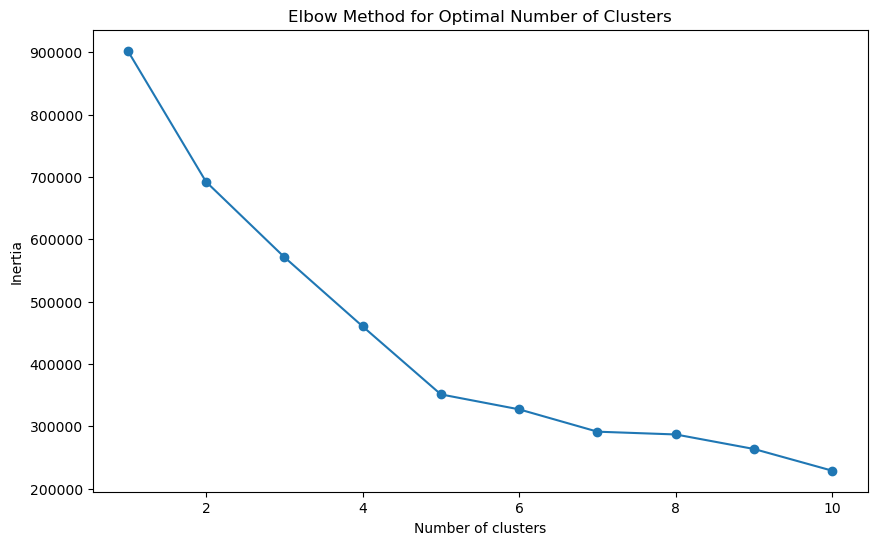

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# List of numerical features to use for clustering
numerical_features = ['MAINACTBAL','AGEONNETWORK', 'ARPUD1_30', 'SUMDATAUSGCD1_30', 'SUMVOICEUSGCD1_30', 
                      ]
# Extract numerical data
X = df_cleaned[numerical_features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()



In [71]:
# Apply K-means clustering with the chosen number of clusters 
k_optimal = 5
kmeans = KMeans(n_clusters=k_optimal, random_state=0)
df_cleaned['Cluster'] = kmeans.fit_predict(X_scaled)

In [72]:
# Display cluster centers
print("Cluster centers:")
print(scaler.inverse_transform(kmeans.cluster_centers_))

Cluster centers:
[[6.97162809e+01 2.79175356e+03 1.24930495e+02 1.17508250e+09
  5.38189251e+03]
 [3.68261798e+00 2.46781914e+03 3.63103756e+02 8.72680309e+08
  2.27435224e+04]
 [3.80661120e+00 9.50804843e+02 5.50537854e+01 1.90267362e+09
  4.13315839e+03]
 [6.55343987e+00 4.33488042e+03 6.61783255e+01 1.42353424e+09
  4.89666454e+03]
 [5.68092103e+00 1.36132342e+03 5.40416160e+02 1.66844945e+10
  6.82775257e+03]]


## Visualizing the Clusters

In [74]:
# Reduce dimensions to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_cleaned['PCA1'] = X_pca[:, 0]
df_cleaned['PCA2'] = X_pca[:, 1]


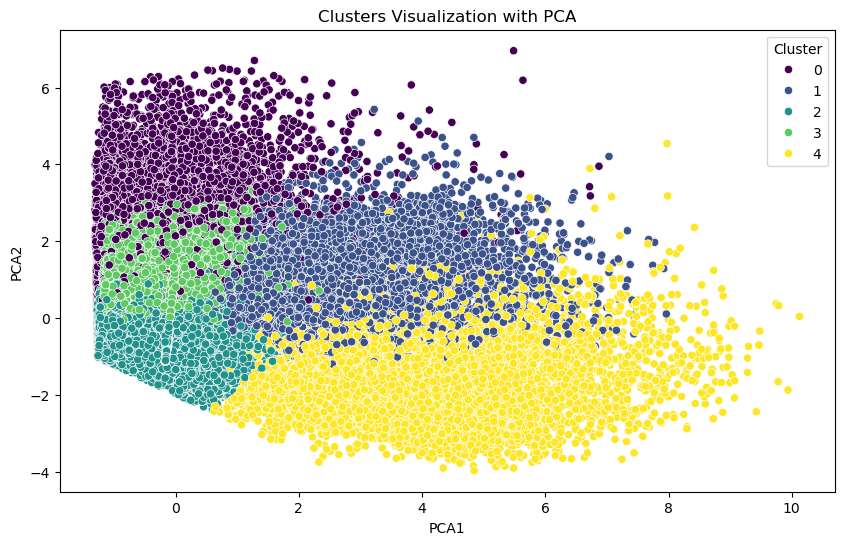

In [75]:
# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_cleaned, palette='viridis')
plt.title('Clusters Visualization with PCA')
plt.show()


In [76]:
# from sklearn.metrics import silhouette_score

# # Calculate Silhouette Score
# silhouette_avg = silhouette_score(X_scaled, df_cleaned['Cluster'])
# print(f"Silhouette Score: {silhouette_avg:.4f}")

## Study each Cluster

In [78]:
# Group by cluster and calculate summary statistics
def unique_values(x):
    return list(x.unique())
cluster_summary = df_cleaned.groupby('Cluster').agg({
    'AGEONNETWORK': ['mean', 'std', 'min', 'max'],
    'DEVICE_NETWORK':[unique_values],
    'ARPUD1_30': ['mean', 'std', 'min', 'max'],
     # 'SUMVCEREVCD1_30': ['mean', 'std', 'min', 'max'],
     # 'SUMDATAREVCD1_30': ['mean', 'std', 'min', 'max'],
    'SUMDATAUSGCD1_30': ['mean', 'std', 'min', 'max'],
    'SUMVOICEUSGCD1_30': ['mean', 'std', 'min', 'max'],
    'SUMDATAUSG4GCD1_15': ['mean', 'std', 'min', 'max'],
    'SUMDATAUSG4GCD15_30': ['mean', 'std', 'min', 'max']
})

print(cluster_summary)


        AGEONNETWORK                                DEVICE_NETWORK  \
                mean          std     min     max    unique_values   
Cluster                                                              
0        2790.931247  1950.886898   101.0  6638.0  [1, 0, 2, 3, 4]   
1        2467.950136  1781.554100   101.0  6638.0  [0, 1, 2, 3, 4]   
2         950.867969   689.481805   101.0  3019.0  [0, 2, 3, 1, 4]   
3        4334.915009  1100.751055  2280.0  6638.0  [2, 3, 1, 0, 4]   
4        1361.374084  1382.502629   101.0  6636.0  [3, 2, 1, 0, 4]   

          ARPUD1_30                          SUMDATAUSGCD1_30  ...  \
               mean         std  min     max             mean  ...   
Cluster                                                        ...   
0        125.015998  132.908814  0.0  1054.0     1.177288e+09  ...   
1        363.108260  153.672557  0.0  1068.0     8.727380e+08  ...   
2         55.063176   78.506504  0.0   699.0     1.902646e+09  ...   
3         66.210376

# Conclusion

- <b>Cluster 0: Medium to high average AGEONNETWORK, medium ARPUD1_30, and a relatively balanced distribution in other features.</b>
- <b>Cluster 1: High average AGEONNETWORK and high ARPUD1_30, indicating a potentially high-value customer segment.</b>
- <b>Cluster 2: Low average AGEONNETWORK and ARPUD1_30, possibly younger or less active users.</b>
- <b>Cluster 3: High average AGEONNETWORK with moderate ARPUD1_30, similar to Cluster 1 but with less variation.</b>
- <b>Cluster 4: Low AGEONNETWORK but very high ARPUD1_30, indicating high data usage but potentially lower engagement.</b>

- <b>Cluster 0: Balanced Users<div></div></b>
 <ul>
            <li><b>Offer: "Upgrade to Premium for a Discounted Rate"<b/></li>
            <li><b>Rationale: These users have moderate activity. Offering a discount for upgrading to a higher plan can increase average revenue per user without alienating them.</b></li></ul>
<hr>
- <b>Cluster 1: High-Value Users<div></div></b>
 <ul>
            <li><b>Offer: "Exclusive VIP Plan with Added Benefits"<b/></li>
            <li><b>Rationale: This cluster has high engagement and activity. Offering an exclusive plan with additional perks can enhance loyalty and increase revenue.</b></li></ul>
<hr>
- <b>Cluster 2: Low-Engagement Users<div></div></b>
 <ul>
            <li><b>Offer: "Special Data Boost Pack"
<b/></li>
            <li><b>Rationale: With low average usage, offering a special data pack can entice these users to engage more, potentially upgrading their plans later.</b></li></ul>
<hr>
- <b>Cluster 3: High-Engagement Users<div></div></b>
 <ul><li><b>Offer: "Loyalty Rewards Program"Offer: "Exclusive VIP Plan with Added Benefits"<b/></li>
            <li><b>Rationale: These users are already engaged. A rewards program can increase their spending by offering points or discounts on future purchases.</b></li></ul>
            <hr>
- <b>Cluster 4: High Data Users<div></div></b>
 <ul><li><b>Offer: "Custom Data Plans with Added Value"<b/></li>
            <li><b>Rationale: These users have high data consumption. Offering customized data plans with added benefits (like extra data or speed) can increase their satisfaction and revenue.</b></li></ul>









<hr>
<hr>

To validate the effectiveness of these offers, we can use a simple revenue model. Assume R is the revenue generated by each cluster.<div>
**Revenue Model**<div>
The revenue from an offer can be modeled as:
**Ri= Ni * (Pi + Ui)**
<div>
where:<ul><li>
     Ni= Number of users in cluster</li>
    <li> Pi= Price increase from the offer (e.g., upgrade or additional fee)</li>
     <li>Ui= Average usage increase (e.g., additional data consumption leading to upsells)</li</ul></div>

**Calculation**<br>
For Cluster 1:<br>
Number of Users (N1)=45000<br>
Price Increase (P1)=Rs.80(for VIP Plan)<br>
Usage Increase (U1)= Rs.60 (additional revenue from extra data usage)<br>

**So, now R1= N1 * (P1 + U1)
          = 45,000×(20+15)
          = Rs. 1575000**

​


In [84]:
# Group by 'Cluster' and calculate frequency of each unique value in 'DEVICE_NETWORK'
device_network_freq = df_cleaned.groupby('Cluster')['DEVICE_NETWORK'].value_counts().unstack().fillna(0)

# Display the frequencies
print(device_network_freq)

# 0--->1G
# 1--->4G
# 2--->3G
# 3--->2G
# 4--->5G

DEVICE_NETWORK      0      1      2      3    4
Cluster                                        
0                3480   2094   2486   1689  127
1                6027   2944   3145   2929   76
2               32113  14990  25487  30940  718
3               17438   9967   8449   6082  198
4                 105     90   4062   4745  143


In [85]:
# Group by 'Cluster' and calculate frequency of each unique value in 'DEVICE_NETWORK'
device_network_freq = df_cleaned.groupby('Cluster')['CUSTSEGMENT'].value_counts().unstack().fillna(0)

# Display the frequencies
print(device_network_freq)


CUSTSEGMENT      0      1      2      3      4
Cluster                                       
0             4281   1285   1169   1206   1935
1            10244    824     66     30   3957
2            31953  17415  17165  17186  20529
3            13542   6899   6832   6881   7980
4             3664   1660    103      7   3711


In [86]:
df_cleaned.head()

,Mobile_Number,MAINACTBAL,LASTVCEUSGDATE,LASTRECHRGDATE,FIRSTCALLDATE,DEVICETYPE,ISDEVICE3GENABLED,VASSUBSCRIBERFLAG,ISDEVICEDATAENABLED,AGEONNETWORK,...,SUMDATAUSGCD1_30,SUMVOICEUSGCD1_30,SUMDATAUSG4GCD1_15,SUMDATAUSG4GCD15_30,SMARTPHONEFLAG,FIRSTREVGENEVTDATE,DEVICE_NETWORK,Cluster,PCA1,PCA2
0,61159748,0.2630,2023-04-16,2023-04-08,2022-04-14,0,1,0,1,368.0,...,1.133457e+10,12878.00000,2.757945e+08,1.105682e+10,1,2022-04-14,3,4,3.617412,-1.327235
1,17488035,0.1901,2023-04-15,2023-03-26,2007-06-13,0,1,0,1,5786.0,...,0.000000e+00,652.00000,0.000000e+00,0.000000e+00,1,2007-06-14,2,3,-0.649573,1.301638
2,43749562,0.1243,2023-04-01,2023-01-31,2022-02-16,1,0,0,0,425.0,...,4.340080e+09,7641.31728,1.875925e+09,2.041732e+09,0,2022-02-16,0,2,-0.156844,-1.003406
3,87451055,1.6096,2023-04-16,2023-04-11,2013-06-29,0,1,0,1,3570.0,...,4.288550e+05,2721.00000,4.266090e+05,2.246000e+03,1,2013-07-08,3,3,-0.582249,0.526875
4,64576359,5.1838,2023-04-16,2023-04-10,2012-04-30,1,0,0,0,3999.0,...,0.000000e+00,3123.00000,0.000000e+00,0.000000e+00,0,2012-05-05,1,3,-0.553424,0.818994
